In [2]:
%matplotlib inline 
from scipy import stats
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np


In [131]:
vaccine_data_to_load = "vaccine-preventable-disease-cases-by-county-and-year-2.csv" 

#Read the Mouse and Drug Data and the Clinical Trial Data
Vax_Data = pd.read_csv("vaccine-preventable-disease-cases-by-county-and-year-2.csv") 

file = 'Population_Data.csv'

pop_read = pd.read_csv(file)
pop_read
pop_years = pop_read.drop(['2018'], axis = 1)
pop_years.info()
#pop_years_fin = pop_years.set_index("County")
#pop_years_for_plot = pop_years.as_type(string)
#pop_plot = pop_years_fin.to_string
#pop_plot



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
County    15 non-null object
2009      15 non-null int64
2010      15 non-null int64
2011      15 non-null int64
2012      15 non-null int64
2013      15 non-null int64
2014      15 non-null int64
2015      15 non-null int64
2016      15 non-null int64
2017      15 non-null int64
dtypes: int64(9), object(1)
memory usage: 1.2+ KB


In [132]:

Vax_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 4 columns):
disease    7670 non-null object
county     7670 non-null object
year       7670 non-null int64
count      7670 non-null int64
dtypes: int64(2), object(2)
memory usage: 239.8+ KB


In [133]:
#Drop disease we are not going to analyze

dd = Vax_Data.set_index("disease")
dd_drop = dd.drop(["Diphtheria","Hepatitis A", "Hepatitis B, Acute", "Hepatitis C, Acute", "Invasive Meningococcal Disease", "Rubella", "Varicella Hospitalizations"])
dd_drop = dd_drop.reset_index()
dd_drop_counties = dd_drop.set_index("county")

# drop counties we are not going to analyze

# this is what I used to drop the counties with just adding commas:
#print(Vax_Data.iloc[:,1].unique())
# I copied and pasted the output.  I added 15 commas.  


dd_complete_4 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kern' ,'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa',
 'Nevada' ,'Orange', 'Placer' ,'Plumas', 'Riverside', 'Sacramento' ,'San Benito',
 'San Bernardino', 'San Diego' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo', 'San Mateo', 'Santa Barbara' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' ,'Sierra', 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura' ,'Yolo'])
dd_complete_4 = dd_complete_4.reset_index()

#same print unique, copy & paste, add commas. Looks ugly - but we are looking at the data, instead of looking at code

dd_complete_15 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Modoc', 'Mono', 'Monterey',
 'Nevada' , 'Placer' ,'Plumas', 'Riverside' ,'San Benito',
 'San Bernardino' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' , 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne' ,'Yolo'])

dd_complete_15 = dd_complete_15.reset_index()

dd_complete_15.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 4 columns):
county     885 non-null object
disease    885 non-null object
year       885 non-null int64
count      885 non-null int64
dtypes: int64(2), object(2)
memory usage: 27.7+ KB


In [83]:
#trying to get same dataframe with loop
#Al = []
#for county in Vax_Data:
   # if county is ("Alameda"):
       # Al.append(county)
#Al
#output is []   urggggggh
#fail, someone help - don't understand loops yet - used them, but can't 
#get it concrete

[]

In [67]:

dd_years_09 = dd_complete_15[dd_complete_15["year"]== 2009]
dd_years_10 = dd_complete_15[dd_complete_15["year"]== 2010]
dd_years_11 = dd_complete_15[dd_complete_15["year"]== 2011]
dd_years_12 = dd_complete_15[dd_complete_15["year"]== 2012]
dd_years_13 = dd_complete_15[dd_complete_15["year"]== 2003]
dd_years_14 = dd_complete_15[dd_complete_15["year"]== 2014]
dd_years_15 = dd_complete_15[dd_complete_15["year"]== 2015]
dd_years_16 = dd_complete_15[dd_complete_15["year"]== 2016]
dd_years_17 = dd_complete_15[dd_complete_15["year"]== 2017]


#2009 and 2013 only have 45 data points per column, all the other years have 60 
dd_measles_09 = dd_years_09[dd_years_09["disease"]== "Measles"]
dd_measles_10 = dd_years_10[dd_years_10["disease"]== "Measles"]
dd_measles_11 = dd_years_11[dd_years_11["disease"]== "Measles"]
dd_measles_09.head()


,county,disease,year,count
8,Alameda,Measles,2009,0
25,El Dorado,Measles,2009,0
42,Kern,Measles,2009,0
59,Los Angeles,Measles,2009,1
76,Merced,Measles,2009,0


In [134]:
#mung data to fit counts of disease per year (2009-2017) by county

dyr = dd_complete_4.set_index('year')
dyrs = dyr.drop([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008])

dyrs.info()
ddyr_alameda = dyrs[dyrs["county"]== "Alameda"]
ddyr_alameda_meas = ddyr_alameda[ddyr_alameda["disease"]== "Measles"]

ddyr_la = dyrs[dyrs["county"]== "Los Angeles"]
ddyr_la_meas = ddyr_la[ddyr_la["disease"]== "Measles"]

ddyr_yuba = dyrs[dyrs["county"]== "Yuba"]
ddyr_yuba_meas = ddyr_yuba[ddyr_yuba["disease"]== "Measles"]

ddyr_sonoma = dyrs[dyrs["county"]== "Sonoma"]
ddyr_sonoma_meas = ddyr_sonoma[ddyr_sonoma["disease"]== "Measles"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 2009 to 2017
Data columns (total 3 columns):
county     140 non-null object
disease    140 non-null object
count      140 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.4+ KB


In [ ]:
#mung population data to fit plot size


TypeError: 1491482 is not a string

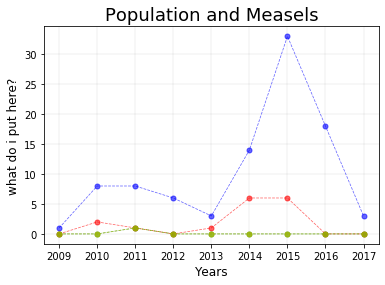

In [96]:
#cheap ass typing more:
x_axis = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

#setting up Measels plot
plt.title('Population and Measels', fontsize = 18)
plt.xlabel('Years', fontsize = 12)
plt.ylabel('what do i put here?', fontsize= 12)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#measles by 4 counties and years
plt.plot(x_axis, ddyr_alameda_meas.iloc[:,2], marker = 'o', markersize=5, linestyle="--", linewidth=0.75, color = 'r', alpha = 0.6, label = "Alameda",)
plt.plot(x_axis, ddyr_la_meas.iloc[:,2], marker = 'o', markersize=5, linestyle="--", linewidth=0.75, color = 'b', alpha = 0.6, label = "LA",)
plt.plot(x_axis, ddyr_yuba_meas.iloc[:,2], marker = 'o', markersize=5, linestyle="--", linewidth=0.75, color = 'g', alpha = 0.6, label = "Yuba",)
plt.plot(x_axis, ddyr_sonoma_meas.iloc[:,2], marker = 'o', markersize=5, linestyle="--", linewidth=0.75, color = 'y', alpha = 0.6, label = "Sonoma",)

#population by 4 counties and years
plt.plot(x_axis, pop_years_for_plot.iloc[0,:])


plt.legend(fontsize = 16)

